<a href="https://colab.research.google.com/github/gitcode-sam/test1/blob/main/California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [ ]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gitcode-sam/test1/main/housing.csv')
df.head(n=25)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -111.11     17.88                  41          880           119.0   
1     -111.11     17.86                  11         7099          1106.0   
2     -111.14     17.85                  51         1467           190.0   
3     -111.15     17.85                  51         1174           115.0   
4     -111.15     17.85                  51         1617           180.0   
5     -111.15     17.85                  51          919           111.0   
6     -111.15     17.84                  51         1515           489.0   
7     -111.15     17.84                  51         1104           687.0   
8     -111.16     17.84                  41         1555           665.0   
9     -111.15     17.84                  51         1549           707.0   
10    -111.16     17.85                  51         1101           414.0   
11    -111.16     17.85                  51         1501           751.0   
12    -111.16     17.85                  51         1491           474.0   
13    -111.16     17.84                  51          696           191.0   
14    -111.16     17.85                  51         1641           616.0   
15    -111.16     17.85                  50         1110           181.0   
16    -111.17     17.85                  51         1966           147.0   
17    -111.17     17.85                  51         1118           191.0   
18    -111.16     17.84                  50         1119           455.0   
19    -111.17     17.84                  51         1501           198.0   
20    -111.17     17.85                  40          751           184.0   
21    -111.17     17.85                  41         1619           167.0   
22    -111.17     17.84                  51         1416           541.0   
23    -111.17     17.84                  51         1688           117.0   
24    -111.17     17.84                  51         1114           417.0   

    population  households  median_income  median_house_value  class  
0          111         116         8.1151              451600      0  
1         1401        1118         8.1014              158500      0  
2          496         177         7.1574              151100      0  
3          558         119         5.6411              141100      0  
4          565         159         1.8461              141100      0  
5          411         191         4.0168              169700      0  
6         1094         514         1.6591              199100      0  
7         1157         647         1.1100              141400      0  
8         1106         595         1.0804              116700      0  
9         1551         714         1.6911              161100      0  
10         910         401         1.1011              181500      0  
11        1504         714         1.1705              141800      0  
12        1098         468         1.0750              111500      0  
13         145         174         1.6716              191100      0  
14        1111         610         1.9167              159100      0  
15         697         164         1.1150              140000      0  
16         791         111         1.7750              151500      0  
17         648         101         1.1101              155500      0  
18         990         419         1.9911              158700      0  
19         690         175         1.6011              161900      0  
20         409         166         1.1578              147500      0  
21         919         166         1.7115              159800      0  
22        1015         478         1.7150              111900      0  
23         851         115         1.1806               99700      0  
24        1006         411         1.6000              111600      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   class               20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### **Classes**

In [ ]:
y = df['class']
target = df['class'].to_numpy()

### **Features**

Data Matrix

In [ ]:
X = df.iloc[:,0:7]
X.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -111.11     17.88                  41          880           119.0   
1    -111.11     17.86                  11         7099          1106.0   
2    -111.14     17.85                  51         1467           190.0   
3    -111.15     17.85                  51         1174           115.0   
4    -111.15     17.85                  51         1617           180.0   
5    -111.15     17.85                  51          919           111.0   
6    -111.15     17.84                  51         1515           489.0   
7    -111.15     17.84                  51         1104           687.0   
8    -111.16     17.84                  41         1555           665.0   
9    -111.15     17.84                  51         1549           707.0   

   population  households  
0         111         116  
1        1401        1118  
2         496         177  
3         558         119  
4         565         159  
5         411         191  
6        1094         514  
7        1157         647  
8        1106         595  
9        1551         714

In [ ]:
X.describe().transpose()

count         mean          std     min      25%  \
longitude           20640.0  -115.352299     3.347868 -119.99  -118.11   
latitude            20640.0    15.473716     4.435636   11.00    11.94   
housing_median_age  20640.0    20.371512    13.494787    1.00    11.00   
total_rooms         20640.0  2048.783430  2046.279914    1.00  1115.00   
total_bedrooms      20433.0   464.914012   396.235276    1.00   157.00   
population          20640.0  1205.330959   960.091284    1.00   787.00   
households          20640.0   426.990116   365.768295    1.00   151.00   

                        50%      75%       max  
longitude           -117.15  -111.44   -110.00  
latitude              14.18    17.71     41.95  
housing_median_age    16.00    19.00     51.00  
total_rooms         1495.00  1818.00  19114.00  
total_bedrooms       418.00   647.00   6445.00  
population          1105.00  1479.00  18566.00  
households           409.00   605.00   6081.00

Notice that the data is not standardizd. So we need to standarize it.

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

count          mean       std       min       25%  \
longitude           20640.0  1.520231e-15  1.000024 -1.385304 -0.823739   
latitude            20640.0 -1.542263e-16  1.000024 -1.008609 -0.796684   
housing_median_age  20640.0  1.652425e-17  1.000024 -1.435516 -0.694471   
total_rooms         20640.0 -2.616340e-17  1.000024 -1.000759 -0.456343   
total_bedrooms      20433.0 -7.233049e-17  1.000024 -1.170833 -0.777118   
population          20640.0  9.088337e-17  1.000024 -1.254423 -0.435731   
households          20640.0  4.681871e-17  1.000024 -1.164673 -0.754567   

                         50%       75%        max  
longitude          -0.536982  1.168623   1.598758  
latitude           -0.291671  0.504175   5.969138  
housing_median_age -0.323949 -0.101635   2.269708  
total_rooms        -0.270636 -0.112785   8.339832  
total_bedrooms     -0.118402  0.459551  15.092630  
population         -0.104504  0.285052  18.082749  
households         -0.049186  0.486686  15.458275

Notice that the data is now standardizd.

**Observations and variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

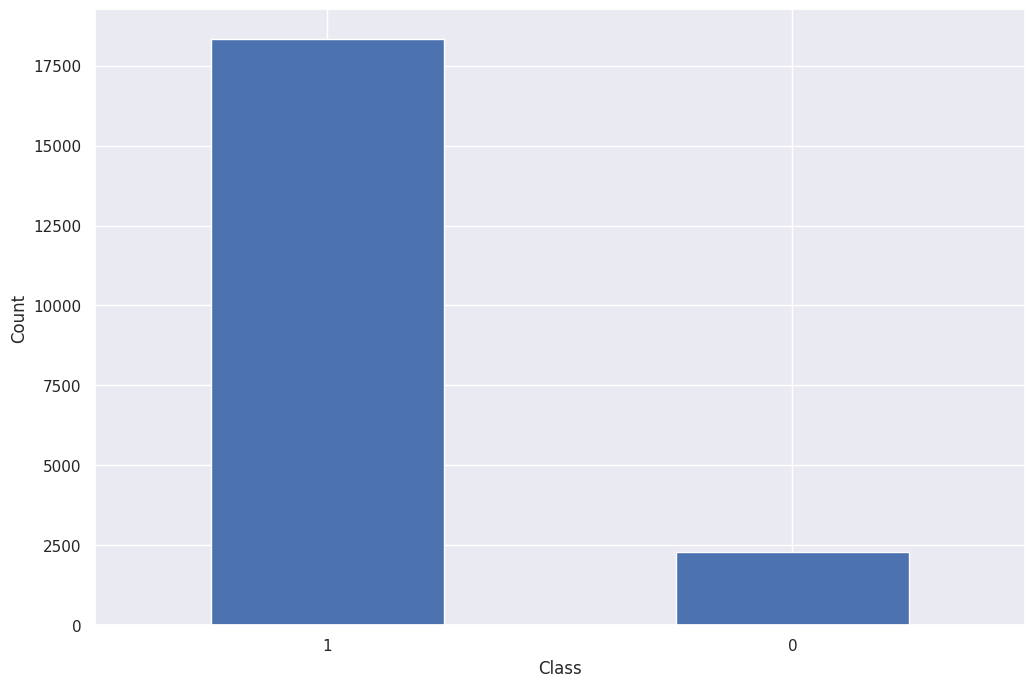

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

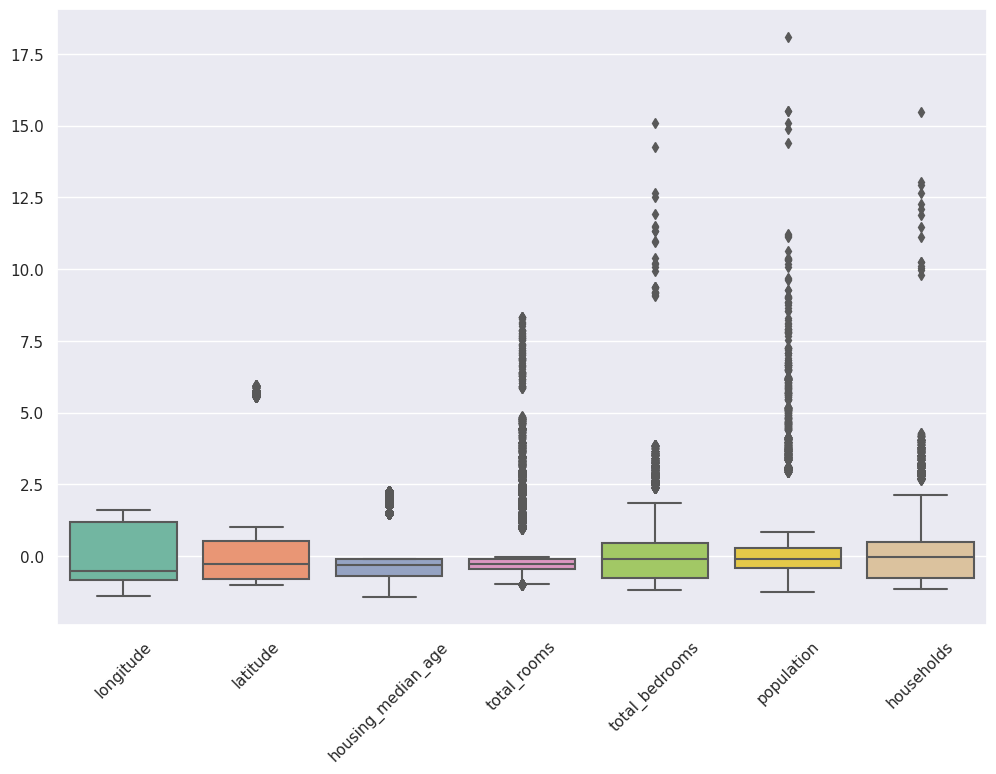

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


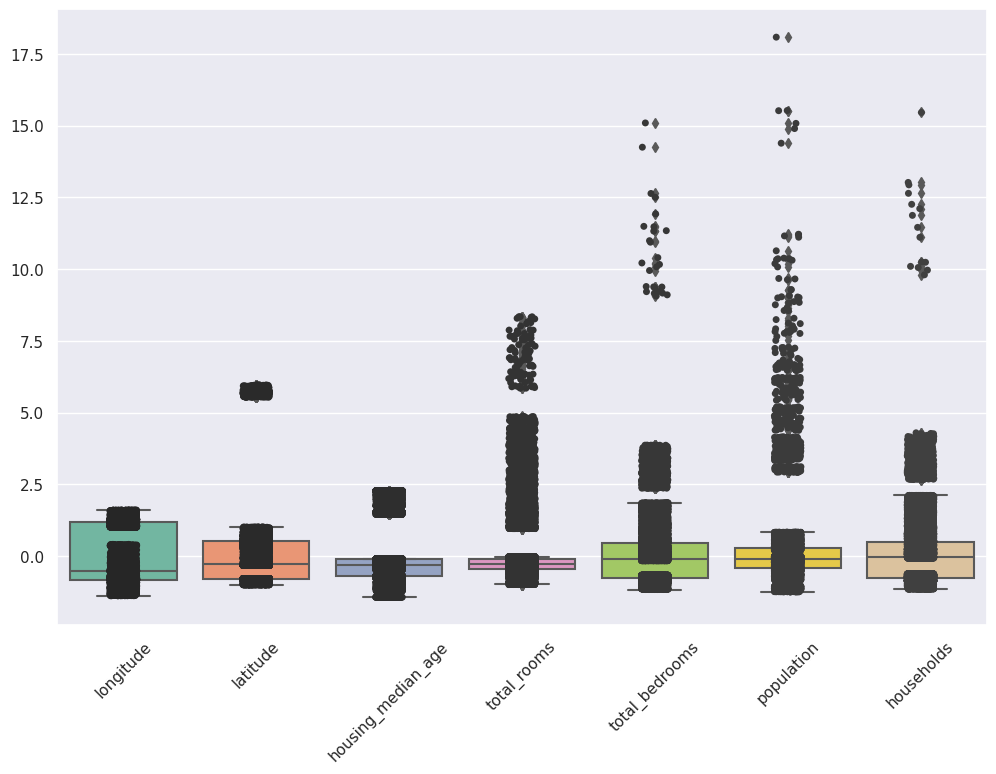

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean   1.520231e-15 -1.542263e-16        1.652425e-17 -2.616340e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -1.385304e+00 -1.008609e+00       -1.435516e+00 -1.000759e+00   
25%   -8.237386e-01 -7.966843e-01       -6.944710e-01 -4.563433e-01   
50%   -5.369820e-01 -2.916712e-01       -3.239486e-01 -2.706359e-01   
75%    1.168623e+00  5.041753e-01       -1.016352e-01 -1.127847e-01   
max    1.598758e+00  5.969138e+00        2.269708e+00  8.339832e+00   

       total_bedrooms    population    households  
count    2.043300e+04  2.064000e+04  2.064000e+04  
mean    -7.233049e-17  9.088337e-17  4.681871e-17  
std      1.000024e+00  1.000024e+00  1.000024e+00  
min     -1.170833e+00 -1.254423e+00 -1.164673e+00  
25%     -7.771180e-01 -4.357305e-01 -7.545673e-01  
50%     -1.184023e-01 -1.045040e-01 -4.918565e-02  
75%      4.595513e-01  2.850517e-01  4.866857e-01  
max      1.509263e+01  1.808275e+01  1.545827e+01

### Pair Plot

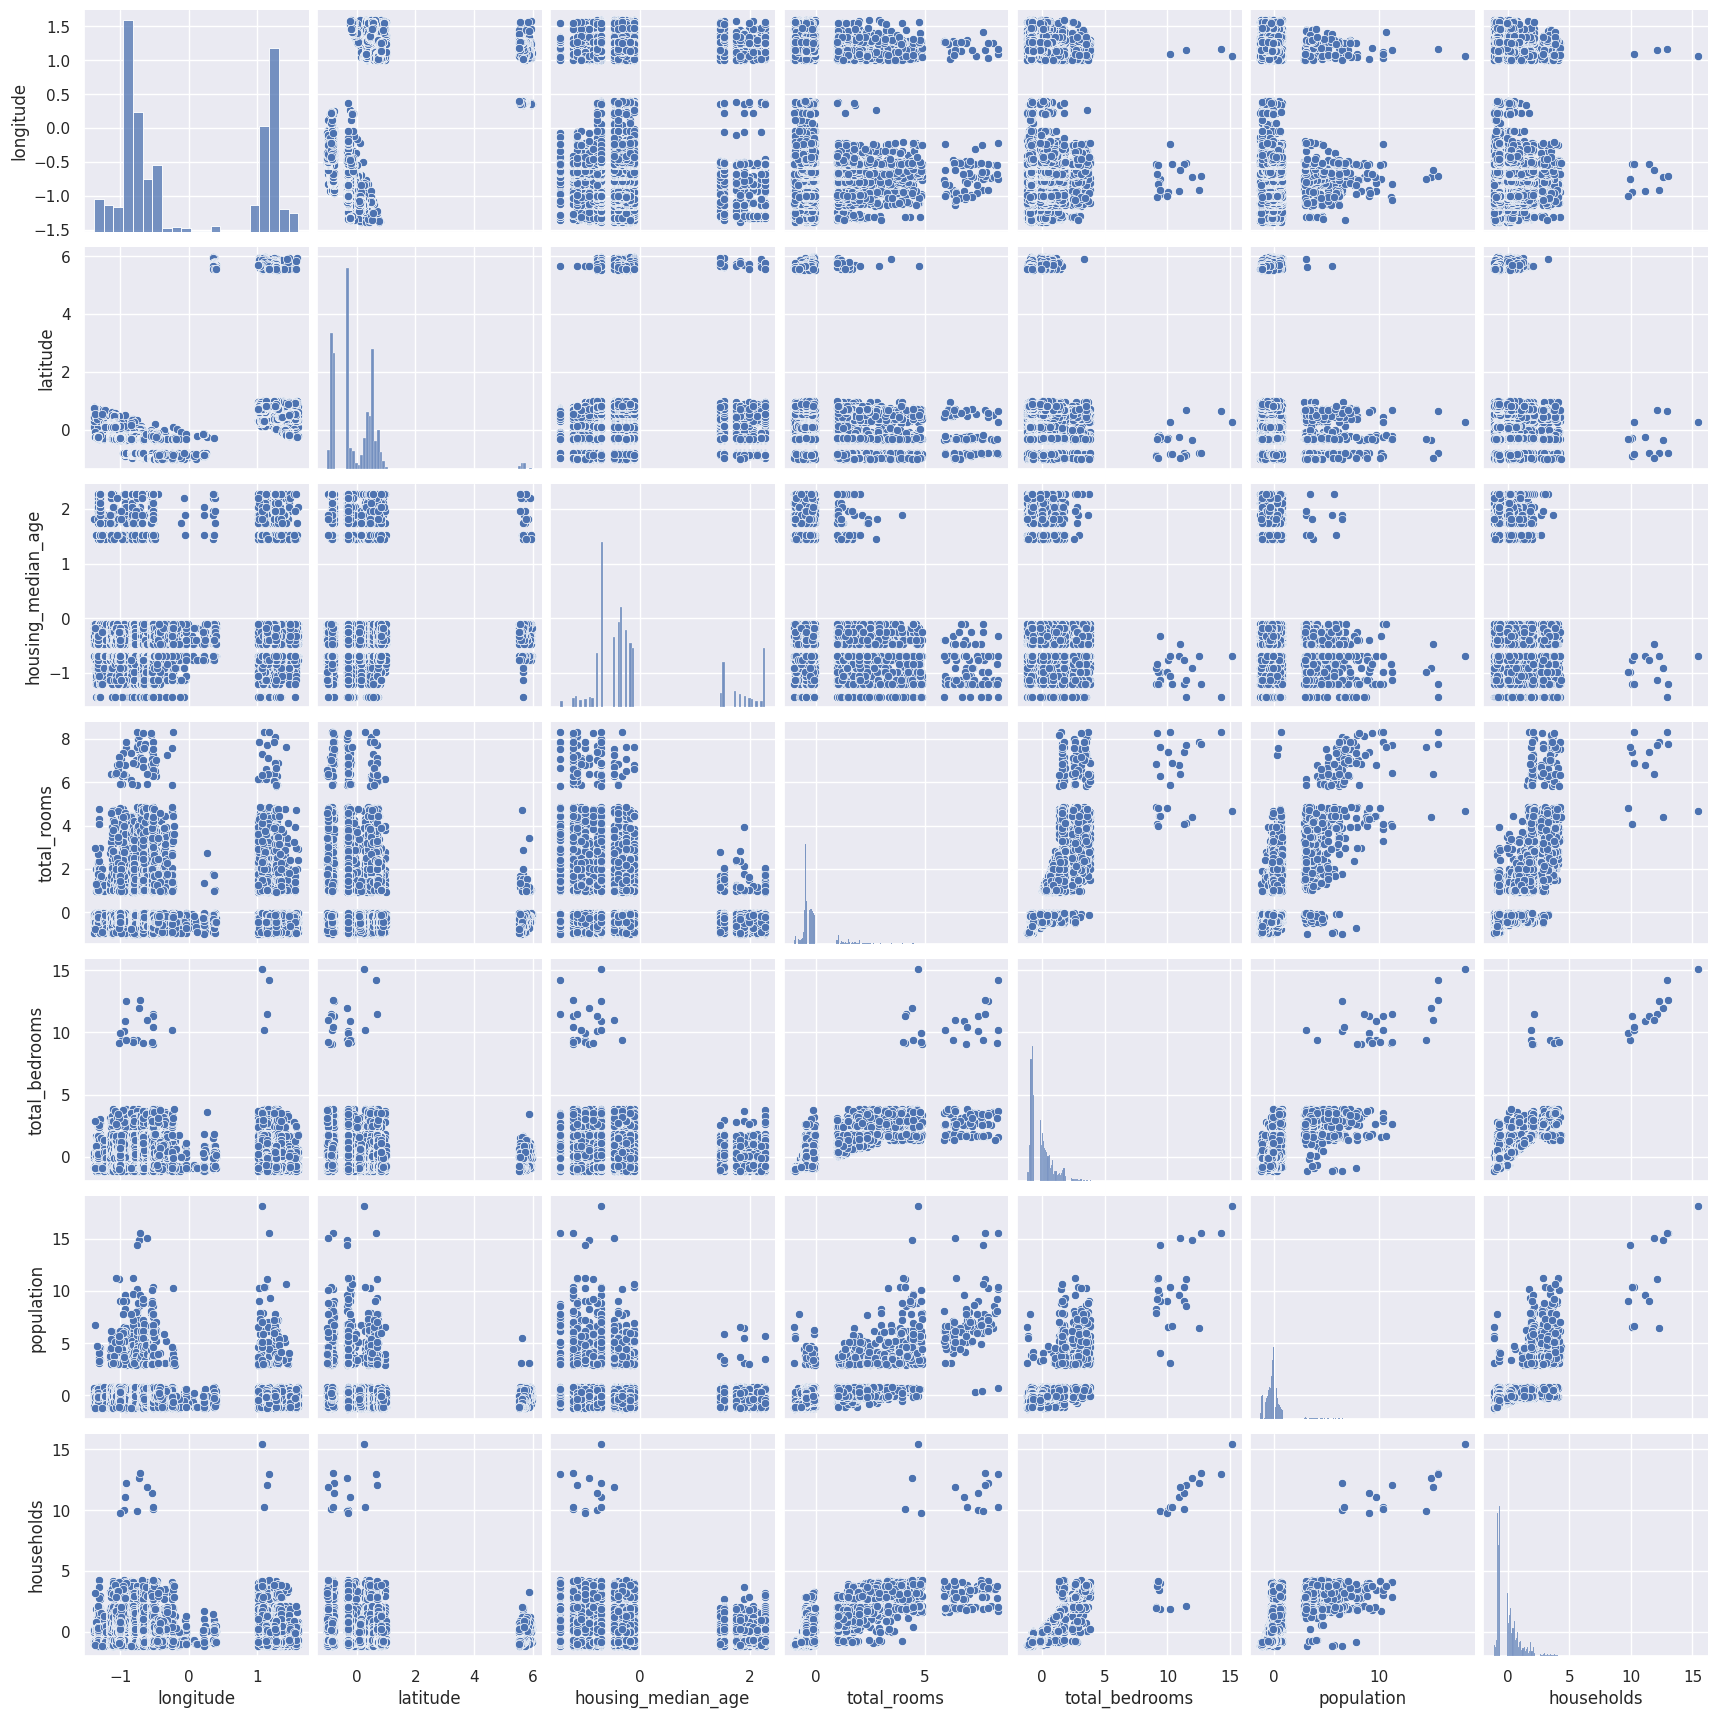

In [ ]:
sns.pairplot(df)

## **Covariance**

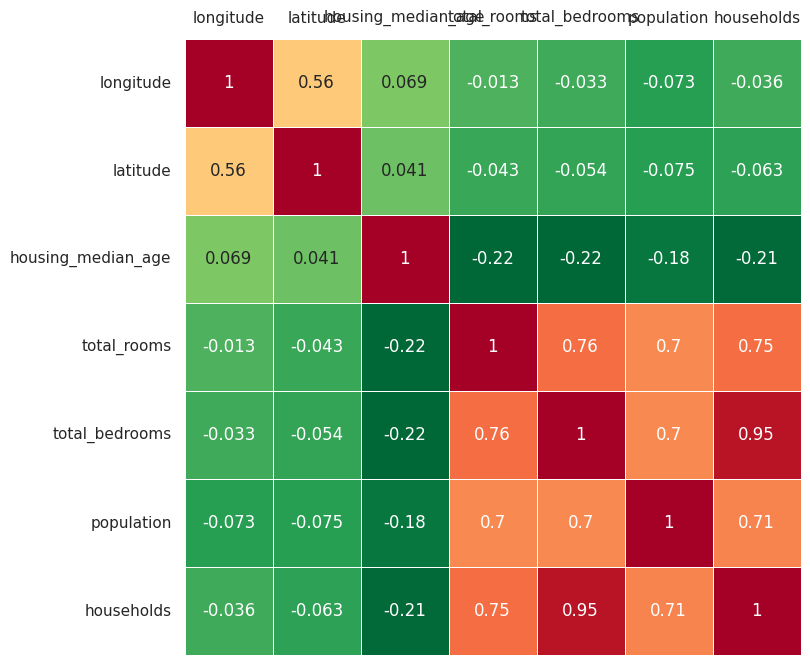

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

In [ ]:
!pip install scikit-learn

Text(0, 0.5, '$Z_2$')

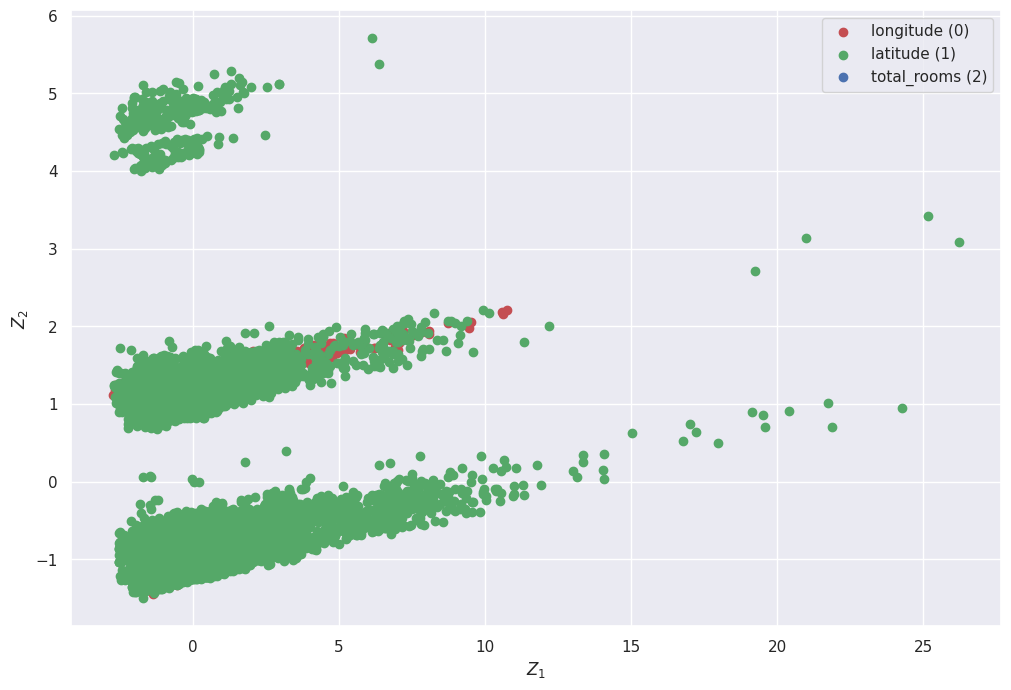

In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(strategy="mean")


# Impute the missing values
df = imputer.fit_transform(df)

pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_longitude = np.where(y == 0)
idx_latitude = np.where(y == 1)
idx_total_rooms = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_longitude,0], Z[idx_longitude,1], c='r', label='longitude (0)')
plt.scatter(Z[idx_latitude,0], Z[idx_latitude,1], c='g', label='latitude (1)')
plt.scatter(Z[idx_total_rooms,0], Z[idx_total_rooms,1], c='b', label='total_rooms (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

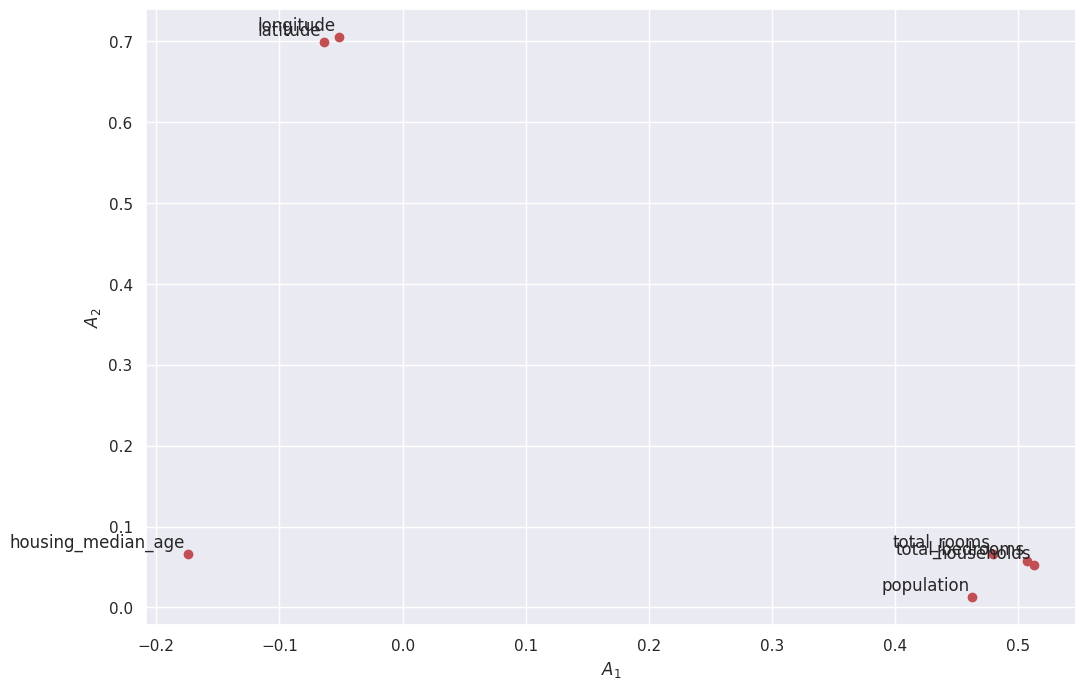

In [ ]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


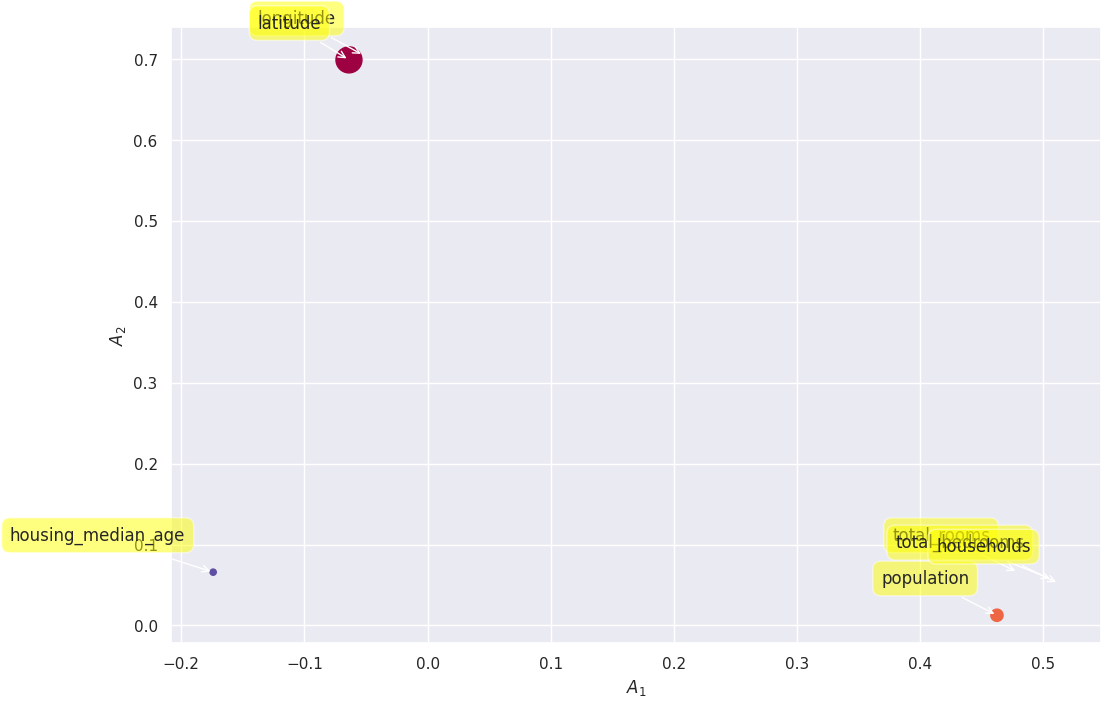

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

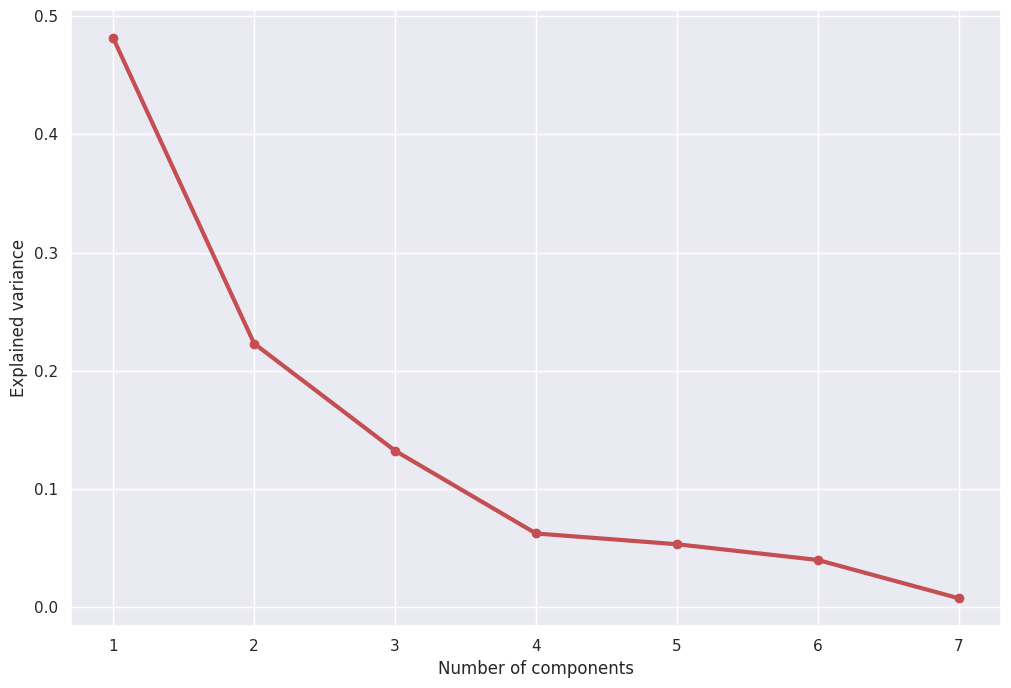

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

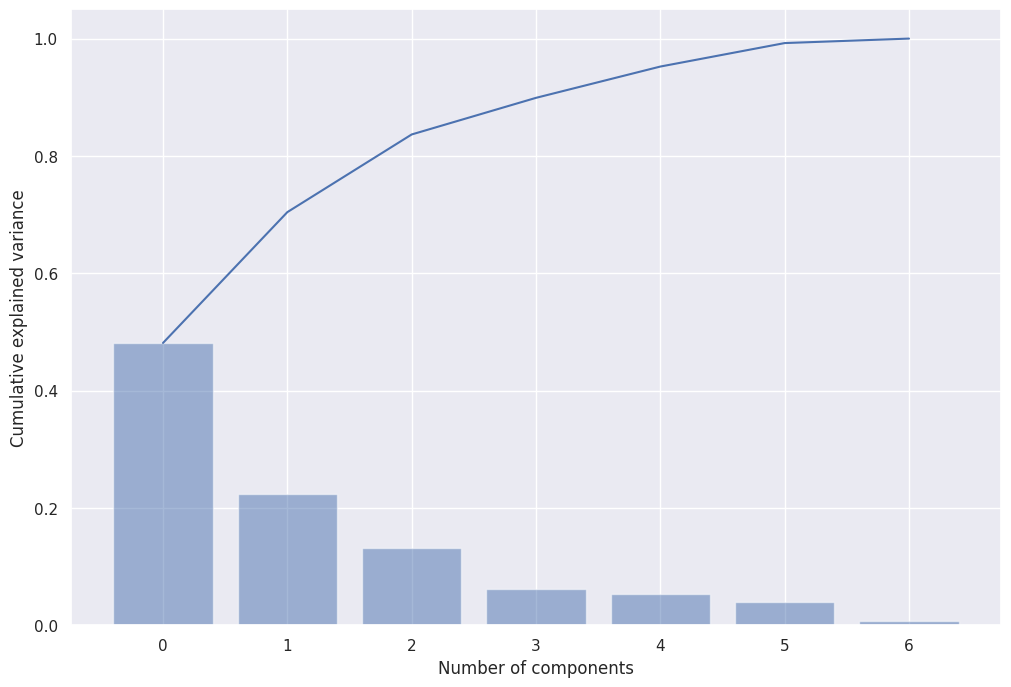

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (48.1%)',
 '1': 'PC 2 (22.3%)',
 '2': 'PC 3 (13.2%)',
 '3': 'PC 4 (6.2%)',
 '4': 'PC 5 (5.3%)',
 '5': 'PC 6 (4.0%)',
 '6': 'PC 7 (0.8%)'}

### **Biplot**

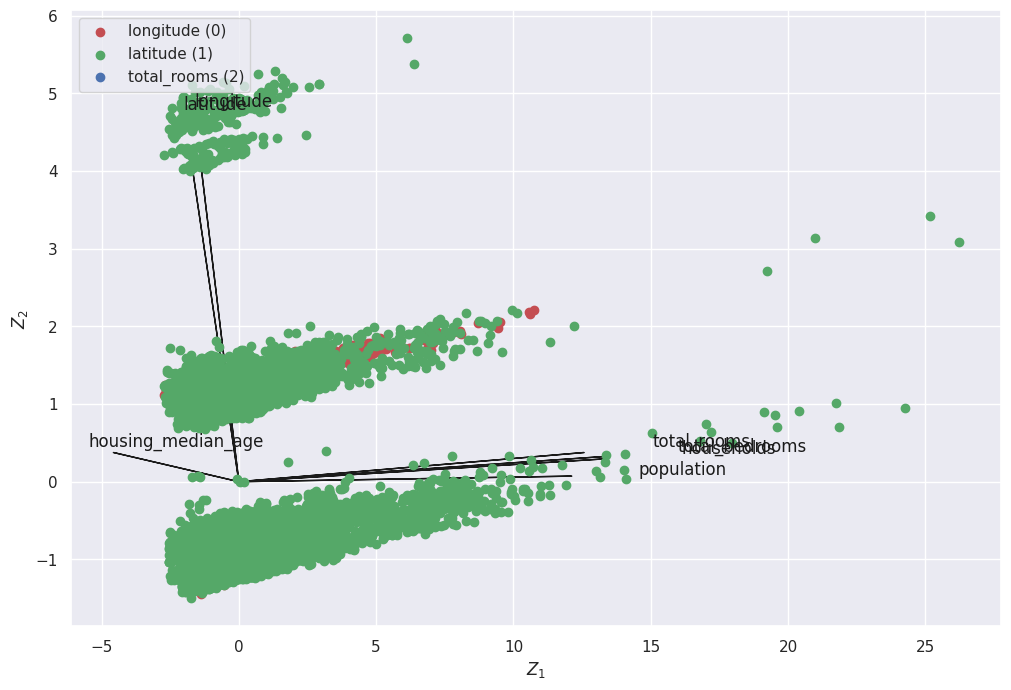

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_longitude,0], Z[idx_longitude,1], c='r', label='longitude (0)')
plt.scatter(Z[idx_latitude,0], Z[idx_latitude,1], c='g', label='latitude (1)')
plt.scatter(Z[idx_total_rooms,0], Z[idx_total_rooms,1], c='b', label='total_rooms (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC feature   loading  type
0  PC1       7  0.512283  best
1  PC2       1  0.704722  best
2  PC3       3  0.980669  best
3  PC4       2  0.700255  best
4  PC5       6  0.732055  best
5  PC1       4  0.479178  weak
6  PC1       5  0.507163  weak


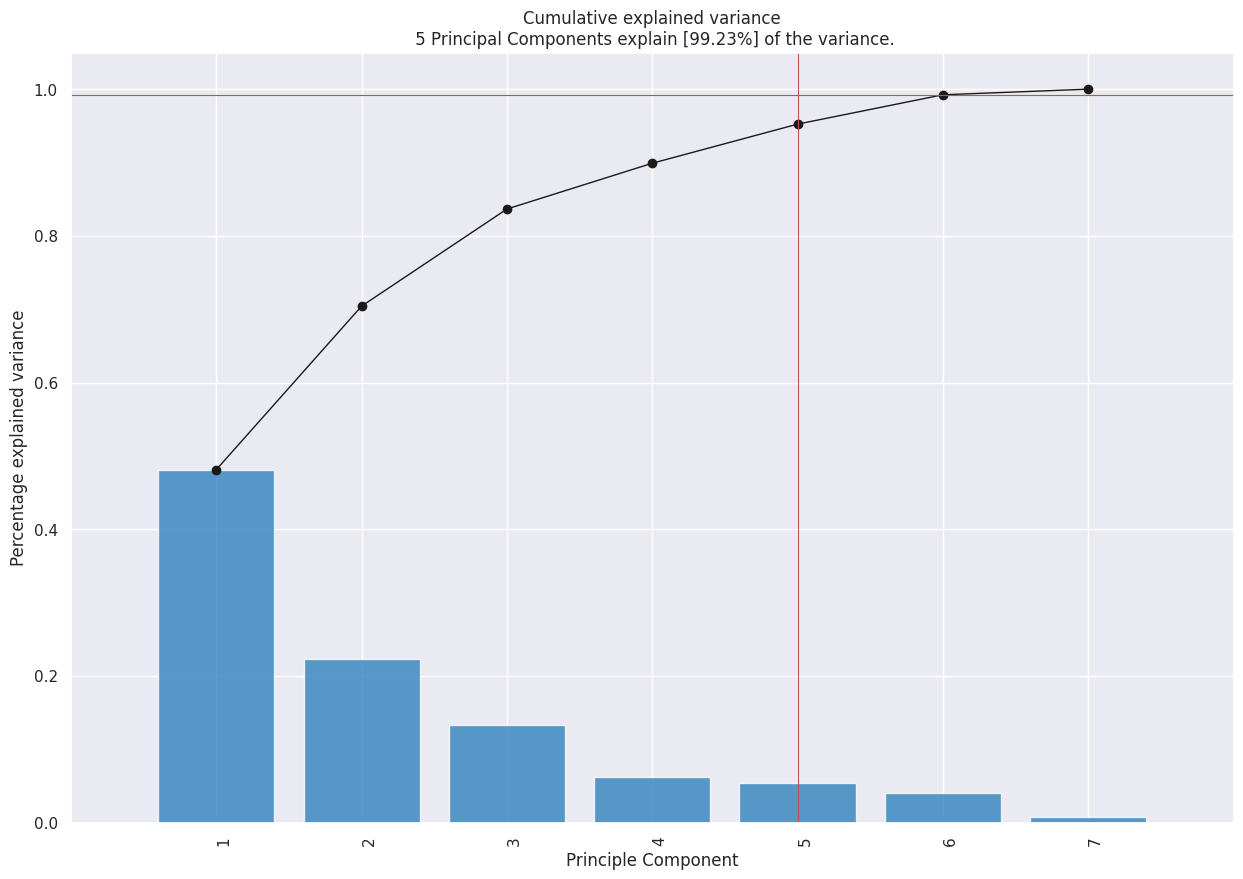

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


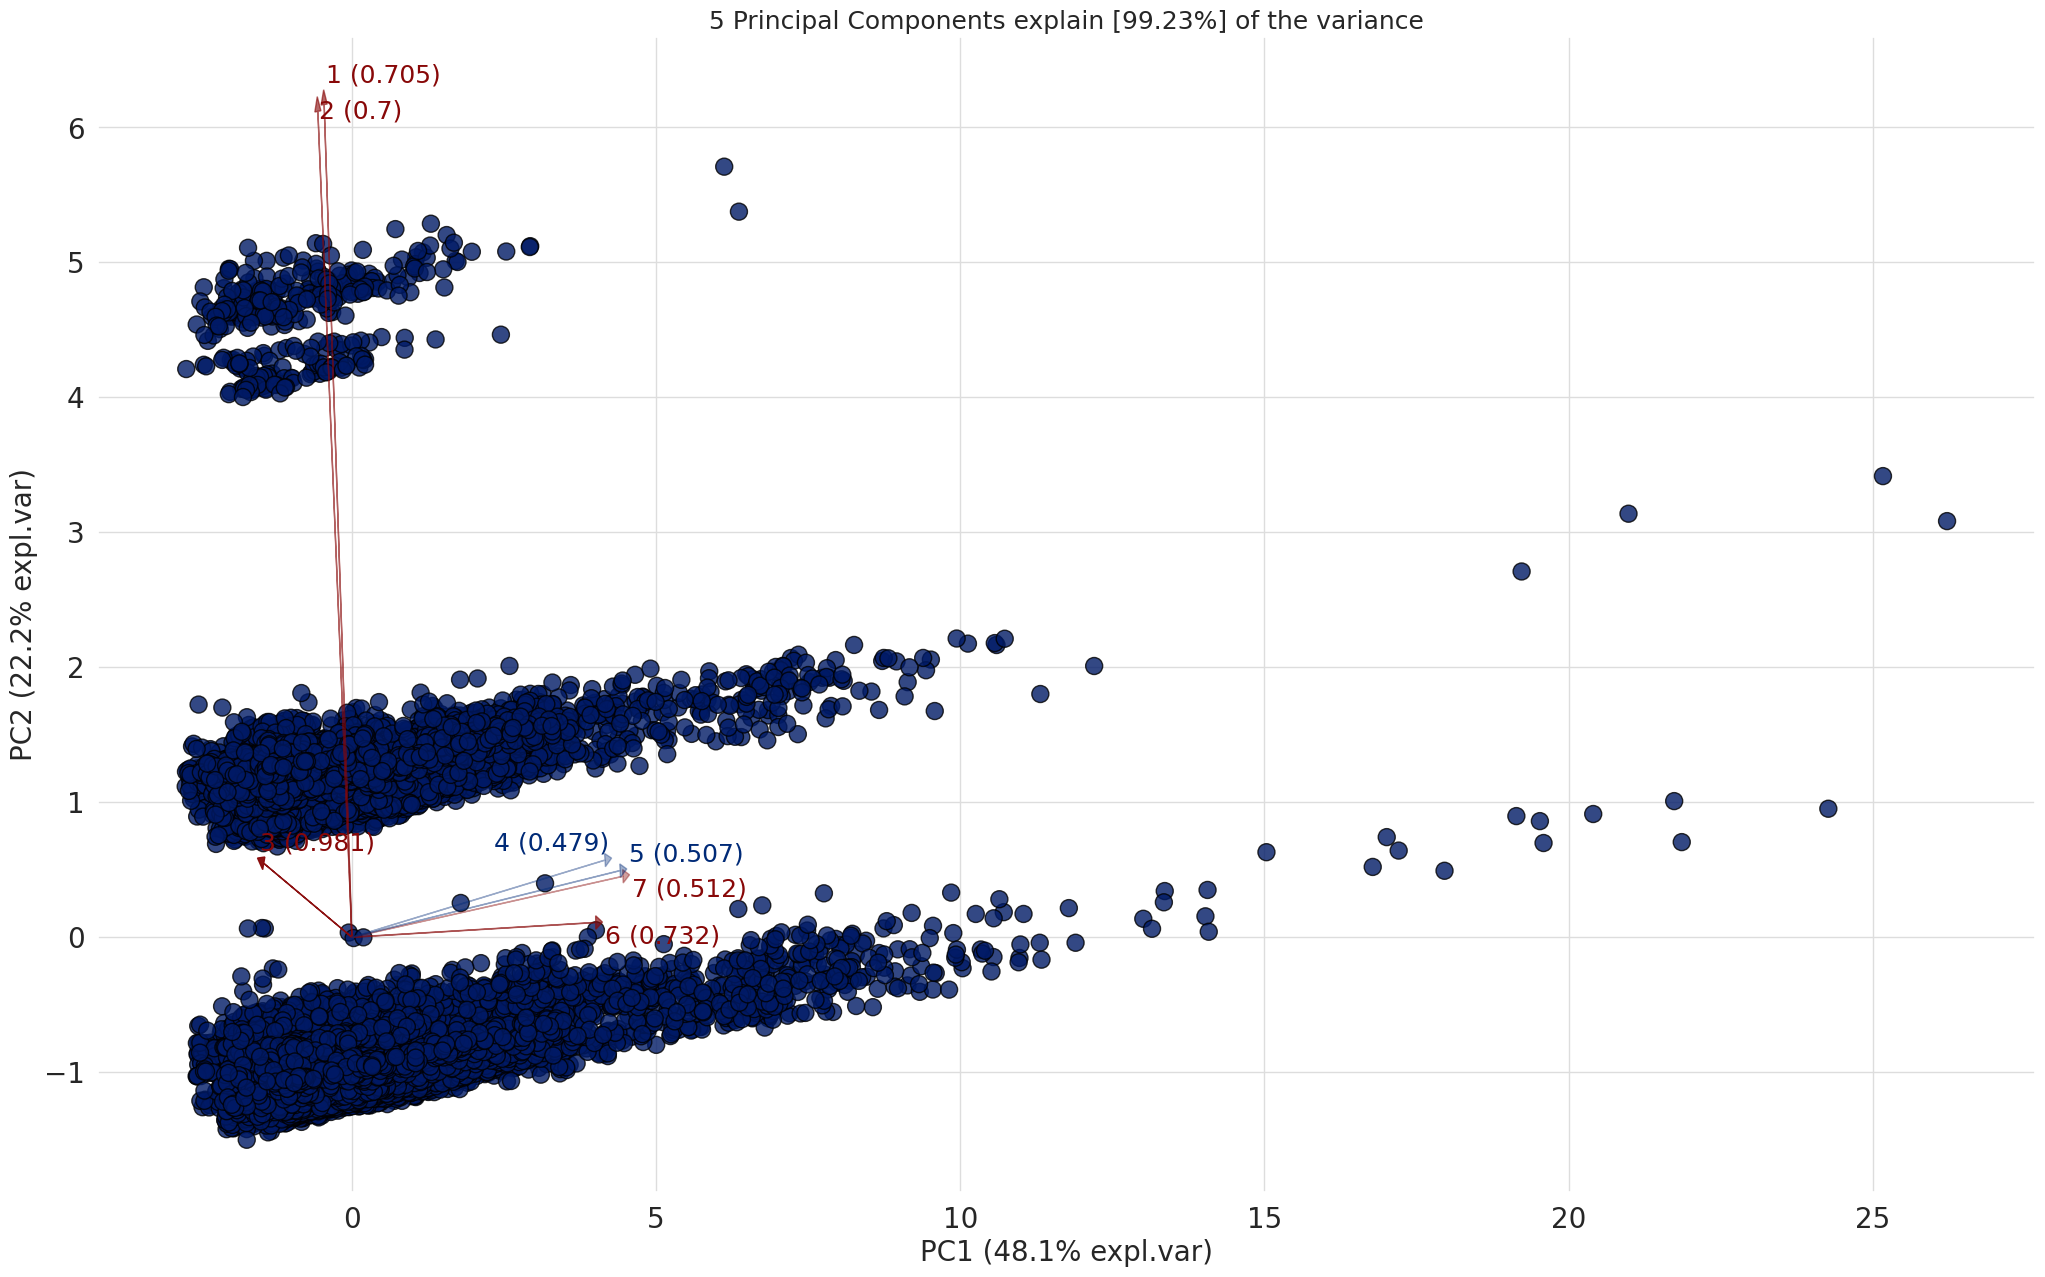

In [ ]:
 ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (48.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

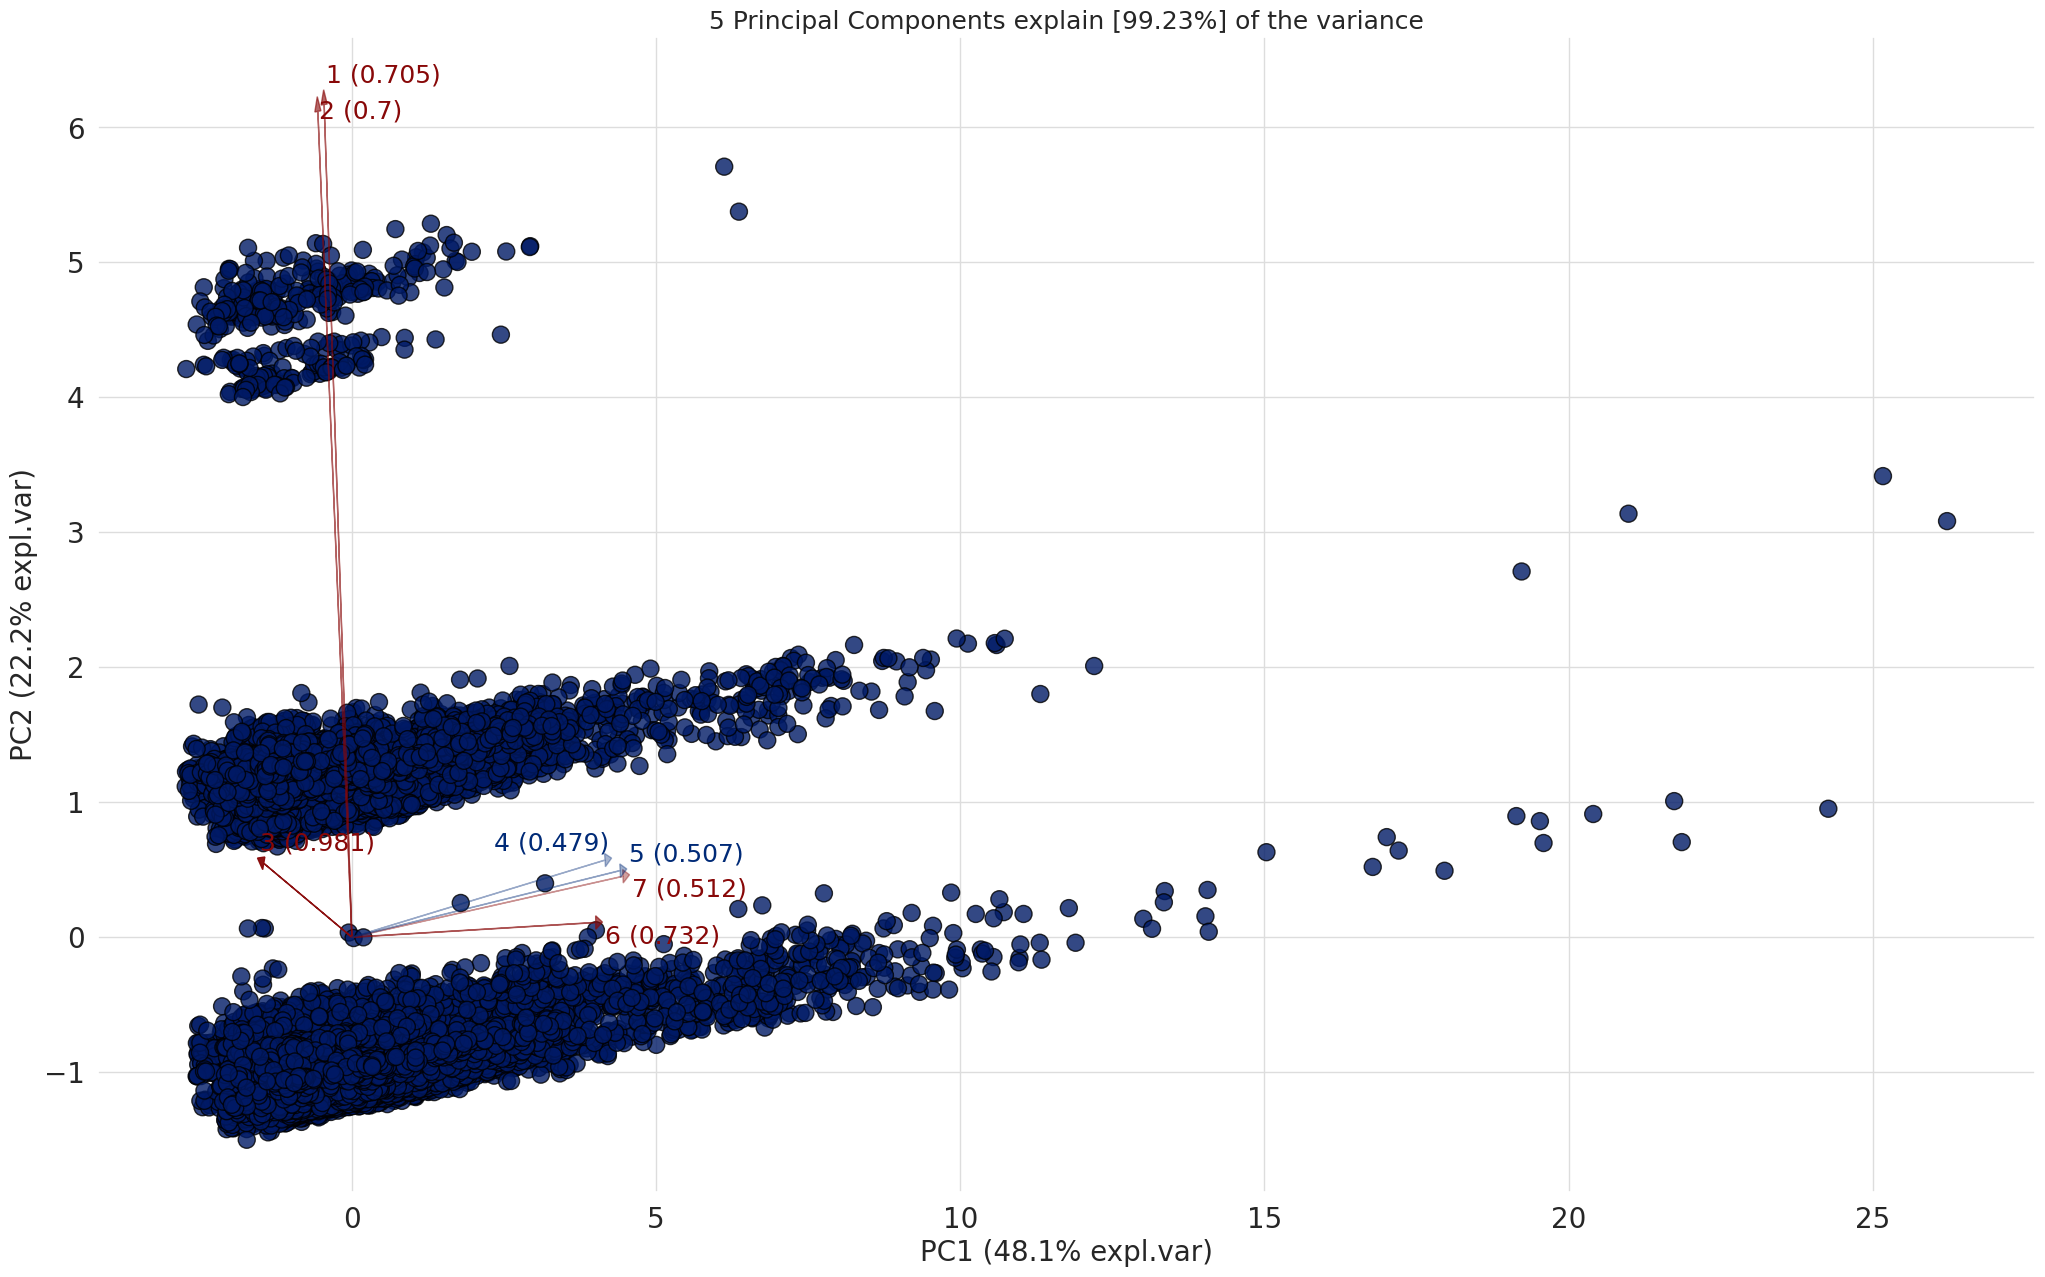

In [ ]:
model.biplot(legend=False)

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.23%] of the variance'}, xlabel='PC1 (48.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

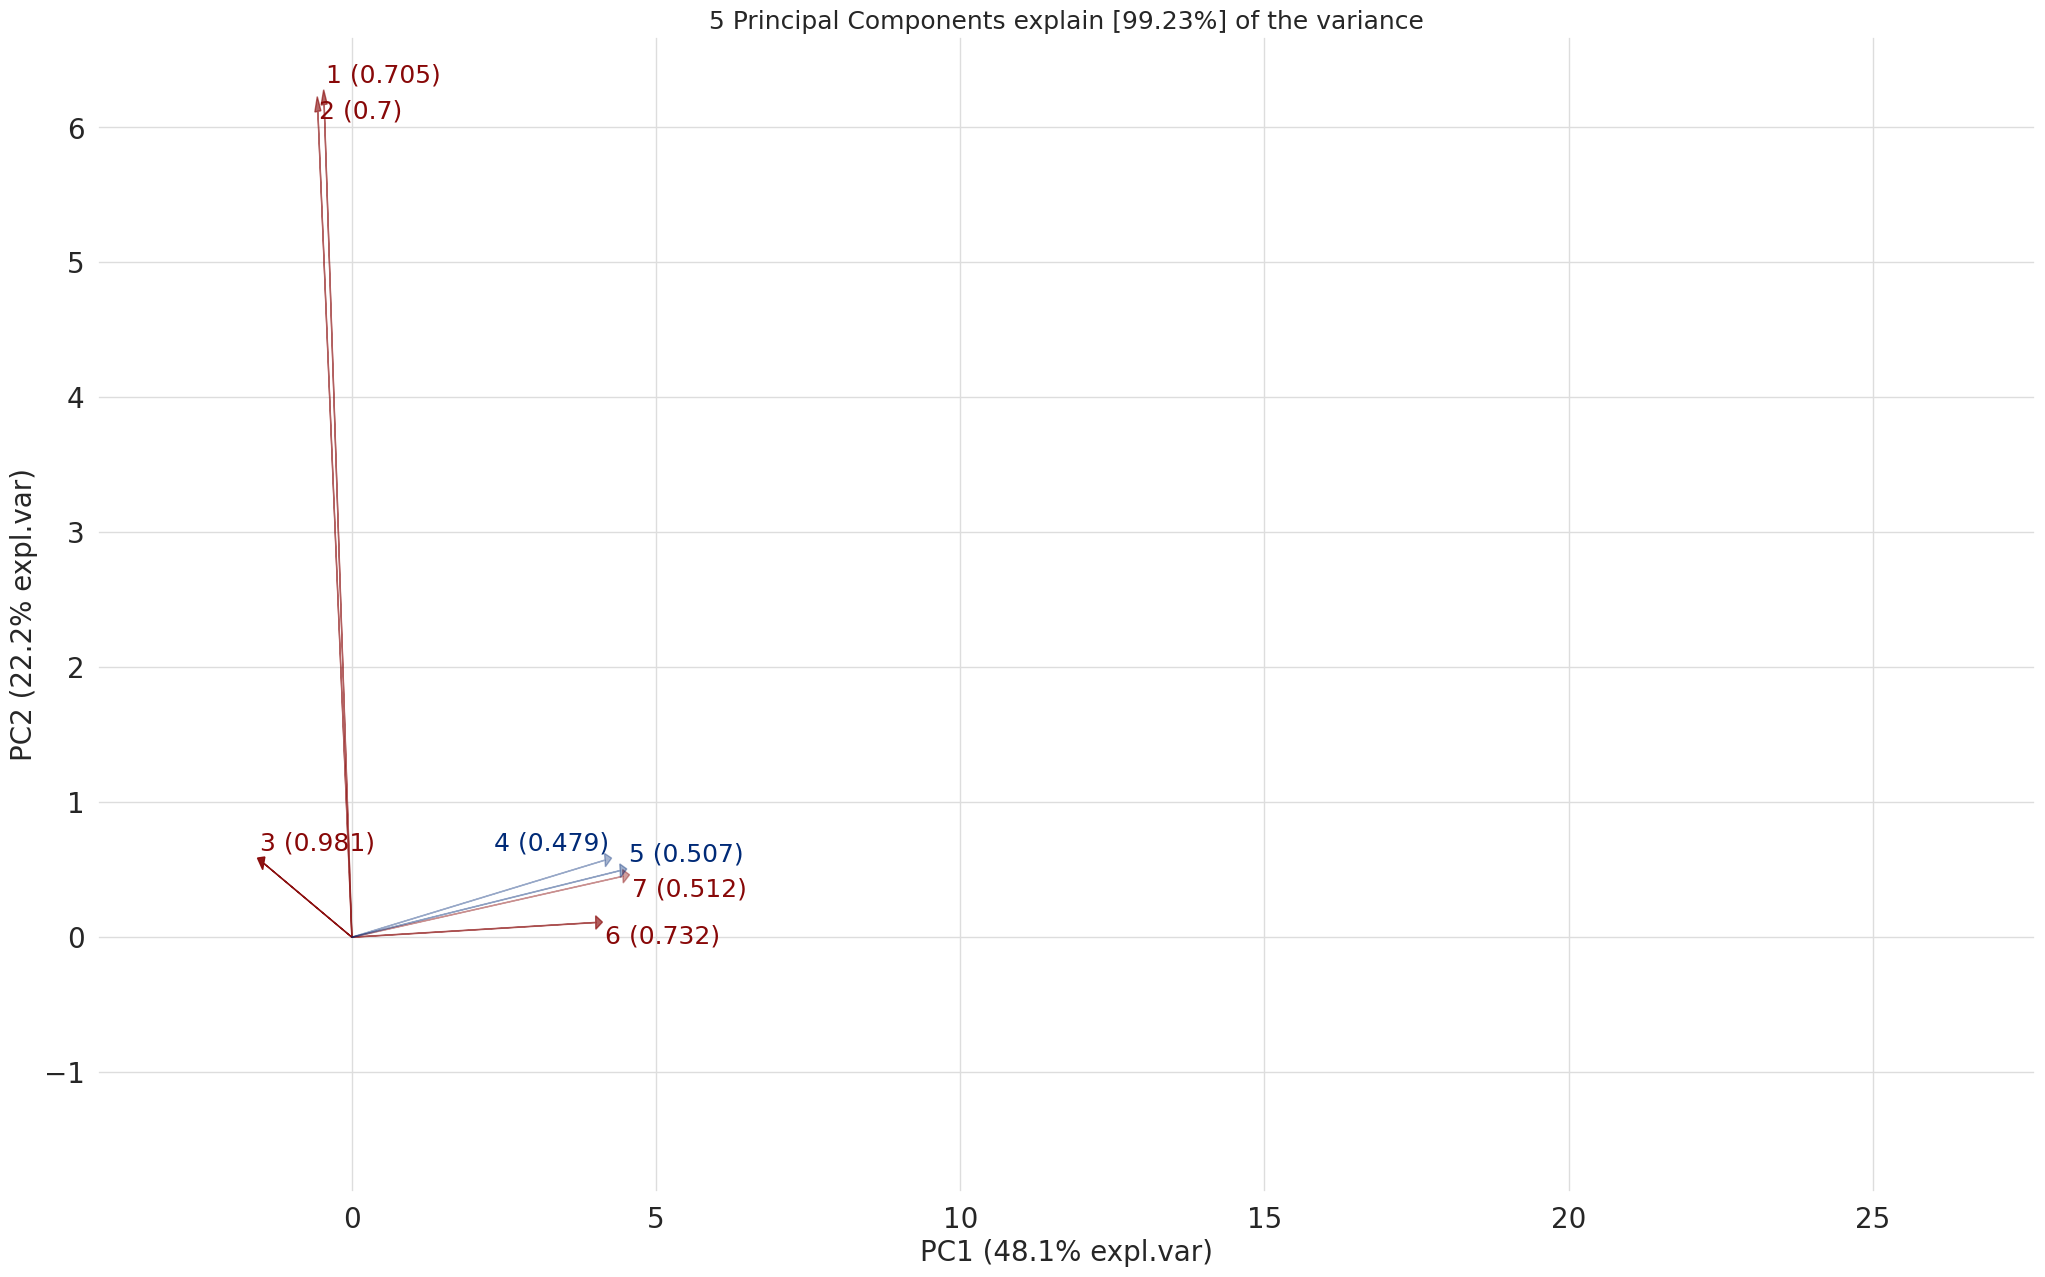

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


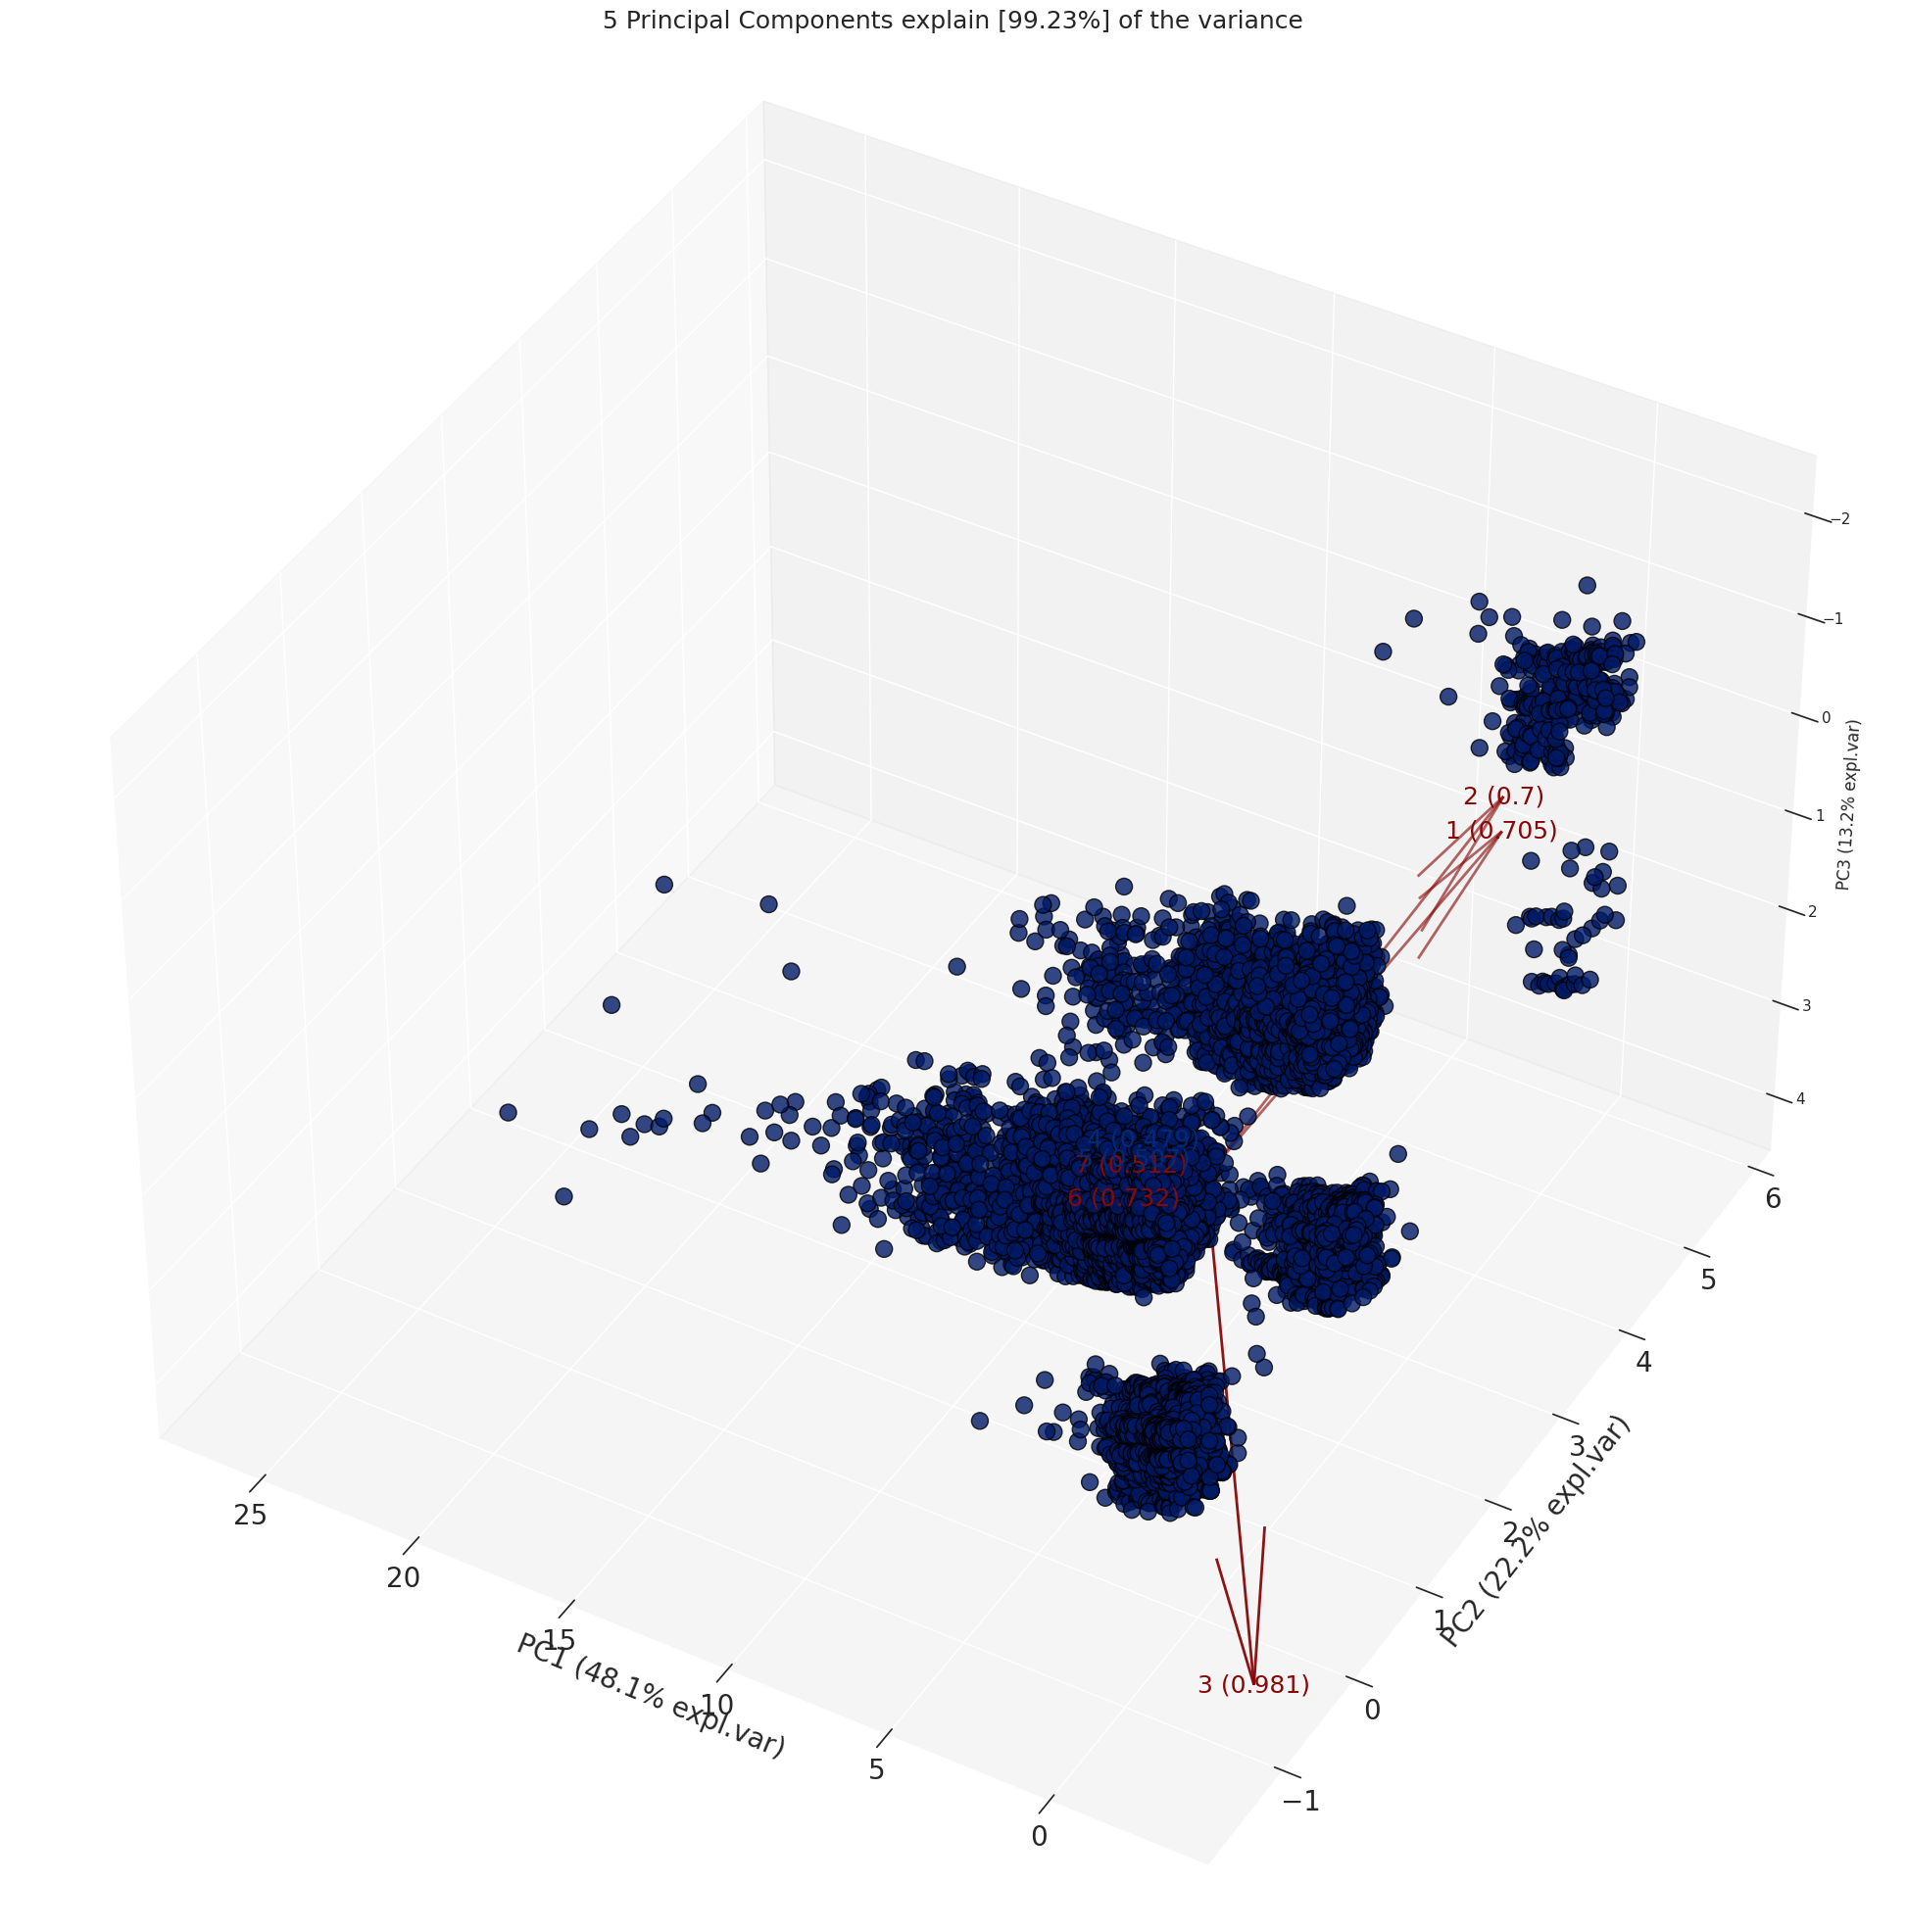

In [ ]:
ax = model.biplot3d(legend=False)

### **Principal components**

AttributeError: ignored

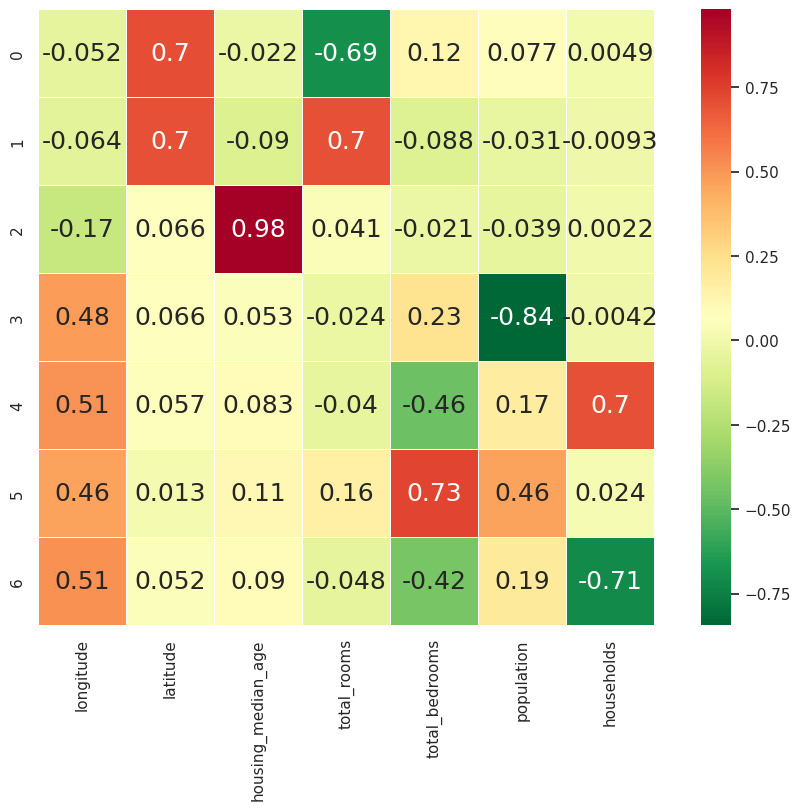

In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  101]
 [  104]
 [  116]
 ...
 [20544]
 [20563]
 [20629]]


### **Control Charts for Principal Components**

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[  283]
 [  570]
 [  576]
 [  780]
 [  799]
 [  864]
 [  865]
 [  867]
 [  869]
 [  871]
 [  875]
 [  883]
 [  887]
 [  889]
 [  922]
 [  985]
 [  995]
 [ 1010]
 [ 1021]
 [ 1053]
 [ 1058]
 [ 1059]
 [ 1060]
 [ 1086]
 [ 1277]
 [ 1380]
 [ 1508]
 [ 1558]
 [ 1560]
 [ 1590]
 [ 1642]
 [ 1700]
 [ 1930]
 [ 2119]
 [ 2122]
 [ 2294]
 [ 2311]
 [ 2312]
 [ 2830]
 [ 2961]
 [ 2963]
 [ 2967]
 [ 2975]
 [ 2978]
 [ 2999]
 [ 3004]
 [ 3149]
 [ 3167]
 [ 3177]
 [ 3413]
 [ 3537]
 [ 3540]
 [ 3546]
 [ 3555]
 [ 3560]
 [ 3603]
 [ 3608]
 [ 3621]
 [ 3622]
 [ 3648]
 [ 3829]
 [ 3871]
 [ 3893]
 [ 3942]
 [ 3963]
 [ 3981]
 [ 3996]
 [ 4029]
 [ 4030]
 [ 4035]
 [ 4038]
 [ 4266]
 [ 4579]
 [ 4616]
 [ 5270]
 [ 5540]
 [ 5630]
 [ 5724]
 [ 5815]
 [ 5844]
 [ 5845]
 [ 5921]
 [ 5924]
 [ 5936]
 [ 5963]
 [ 5964]
 [ 5968]
 [ 5983]
 [ 6055]
 [ 6057]
 [ 6058]
 [ 6060]
 [ 6061]
 [ 6063]
 [ 6065]
 [ 6066]
 [ 6070]
 [ 6091]
 [ 6287]
 [ 6289]
 [ 6297]
 [ 6303]
 [ 6328]
 [ 6329]
 [ 6338]
 [ 6340]
 [ 6401]
 [ 6416]
 [ 6516]
 [ 6518]
 [ 6550

## **Multi-Class Classification**

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

### Gaussian Naive Bayes (GNB)

In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()